In [1]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/MoneyClassification/Train_Data'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/MoneyClassification/Valid_Data'

In [4]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 72 images belonging to 10 classes.
Found 71 images belonging to 10 classes.


In [5]:
train_dataset.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200k': 3,
 '20k': 4,
 '2k': 5,
 '500': 6,
 '500k': 7,
 '50k': 8,
 '5k': 9}

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [12]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
8/8 [==============================] - 3s 266ms/step - loss: 2.5202 - accuracy: 0.0556 - val_loss: 2.4373 - val_accuracy: 0.1268
Epoch 2/50
8/8 [==============================] - 2s 233ms/step - loss: 2.3505 - accuracy: 0.0833 - val_loss: 2.3132 - val_accuracy: 0.1268
Epoch 3/50
8/8 [==============================] - 2s 229ms/step - loss: 2.3041 - accuracy: 0.1111 - val_loss: 2.2891 - val_accuracy: 0.0845
Epoch 4/50
8/8 [==============================] - 2s 225ms/step - loss: 2.2877 - accuracy: 0.1111 - val_loss: 2.2803 - val_accuracy: 0.0986
Epoch 5/50
8/8 [==============================] - 2s 246ms/step - loss: 2.2921 - accuracy: 0.0972 - val_loss: 2.2670 - val_accuracy: 0.1690
Epoch 6/50
8/8 [==============================] - 2s 227ms/step - loss: 2.2707 - accuracy: 0.1111 - val_loss: 2.2626 - val_accuracy: 0.1268
Epoch 7/50
8/8 [==============================] - 2s 219ms/step - loss: 2.2569 - accuracy: 0.1111 - val_loss: 2.2465 - val_accuracy: 0.1408
Epoch 8/50
8/8 [====

In [14]:
model.save('/content/drive/MyDrive/MoneyClassification/MoneyClassification.h5')

In [15]:
moneyclassification_model = load_model('/content/drive/MyDrive/MoneyClassification/MoneyClassification.h5')

In [16]:
score=moneyclassification_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

8/8 [==============================] - 1s 86ms/step - loss: 0.4461 - accuracy: 0.8310
Test loss =  0.44612810015678406
Test accuracy =  0.8309859037399292


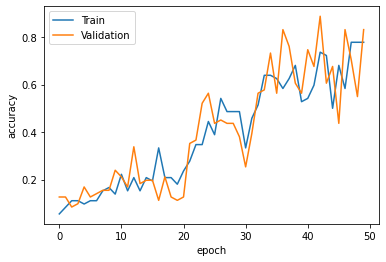

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Tờ tiền này có giá trị là:  500


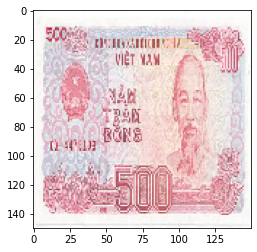

In [21]:
img = load_img('/content/drive/MyDrive/MoneyClassification/Pred_Data/1.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100k','10k','1k','200k','20k','2k','500','500k','50k','5k']
print('Tờ tiền này có giá trị là: ',Label[int(np.argmax(moneyclassification_model.predict(img),axis=-1))])

Tờ tiền này có giá trị là:  2k


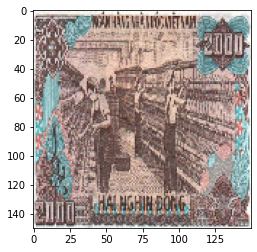

In [22]:
img = load_img('/content/drive/MyDrive/MoneyClassification/Pred_Data/2.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100k','10k','1k','200k','20k','2k','500','500k','50k','5k']
print('Tờ tiền này có giá trị là: ',Label[int(np.argmax(moneyclassification_model.predict(img),axis=-1))])

Tờ tiền này có giá trị là:  500k


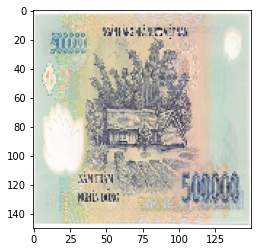

In [23]:
img = load_img('/content/drive/MyDrive/MoneyClassification/Pred_Data/5.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100k','10k','1k','200k','20k','2k','500','500k','50k','5k']
print('Tờ tiền này có giá trị là: ',Label[int(np.argmax(moneyclassification_model.predict(img),axis=-1))])